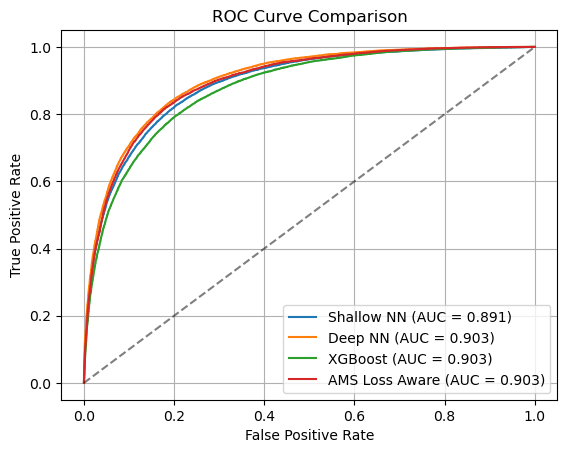

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

shallow = np.load("shallow_results.npz")
deep = np.load("deep_results.npz")
xgb = np.load("xgb_results.npz")
ams_loss = np.load("ams_loss_results.npz")

fpr_s, tpr_s, _ = roc_curve(shallow['y_true'], shallow['y_probs'])
fpr_d, tpr_d, _ = roc_curve(deep['y_true'], deep['y_probs'])
fpr_x, tpr_x, _ = roc_curve(xgb['y_true'], xgb['y_probs'])
fpr_a, tpr_a, _ = roc_curve(ams_loss['y_true'], ams_loss['y_probs'])

auc_s = auc(fpr_s, tpr_s)
auc_d = auc(fpr_d, tpr_d)
auc_x = auc(fpr_x, tpr_x)
auc_a = auc(fpr_a, tpr_a)

plt.plot(fpr_s, tpr_s, label=f"Shallow NN (AUC = {auc_s:.3f})")
plt.plot(fpr_d, tpr_d, label=f"Deep NN (AUC = {auc_d:.3f})")
plt.plot(fpr_x, tpr_x, label=f"XGBoost (AUC = {auc_d:.3f})")
plt.plot(fpr_a, tpr_a, label=f"AMS Loss Aware (AUC = {auc_d:.3f})")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()